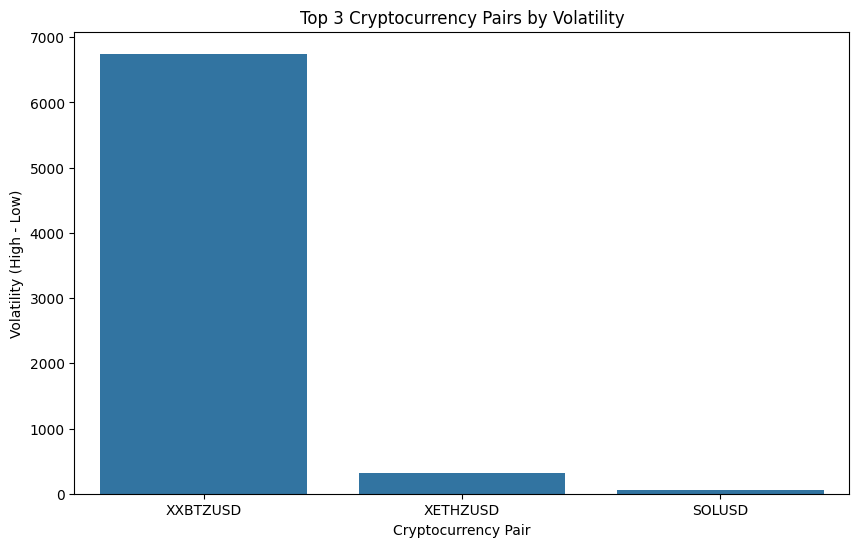

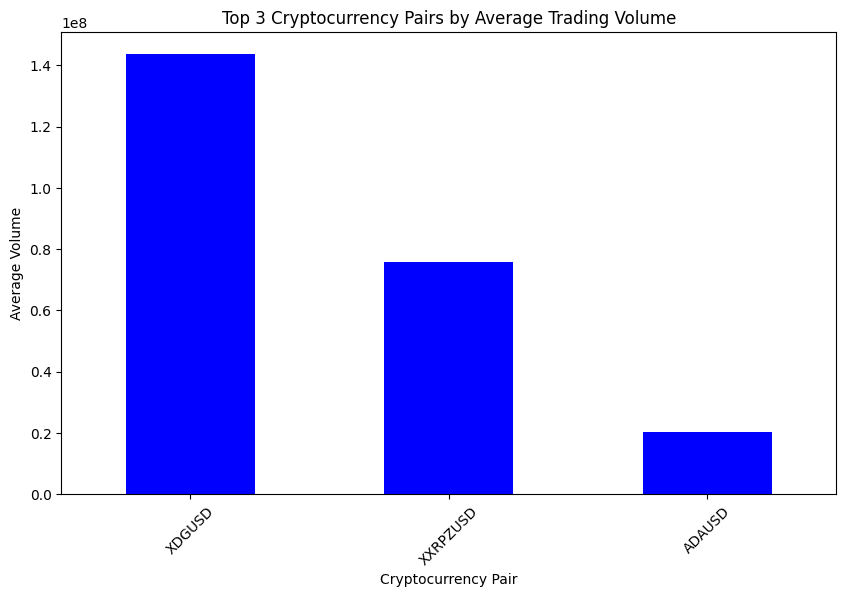

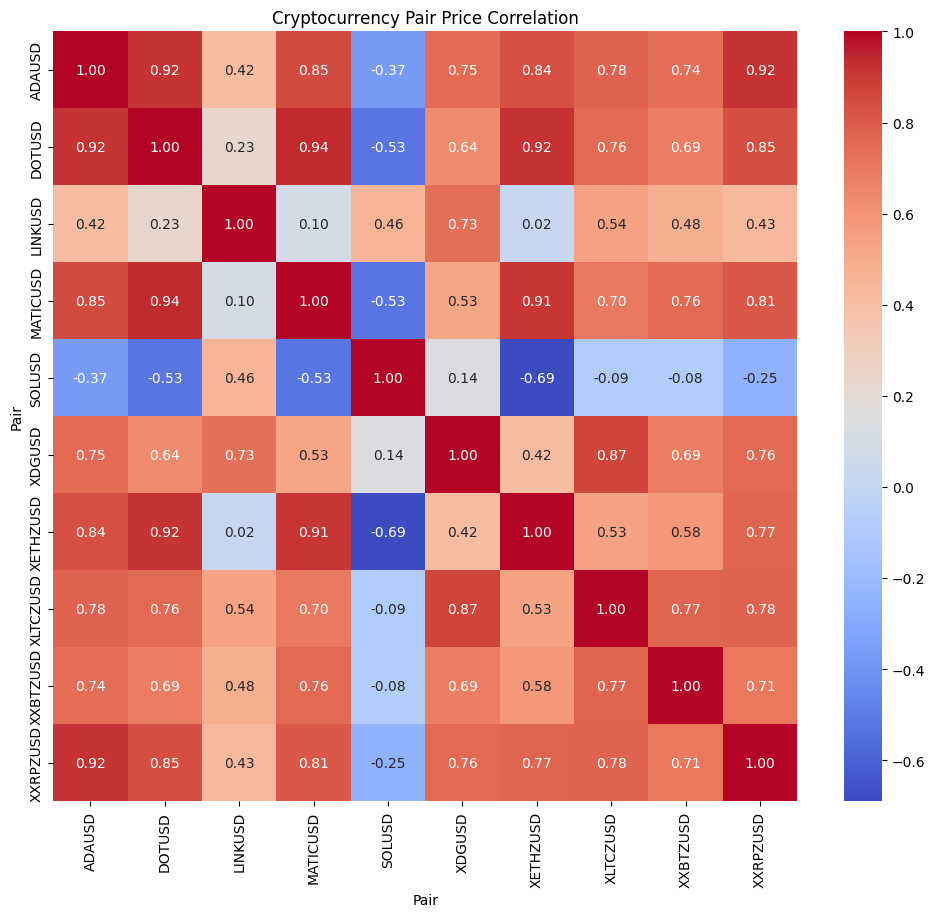

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and combine datasets (replace with actual file paths if not done already)
file_paths = [
    "/content/crypto_data2.csv",
    "/content/crypto_data5.csv",
    "/content/crypto_data6.csv",
    "/content/crypto_data_4.csv"
]
dataframes = [pd.read_csv(file_path) for file_path in file_paths]
combined_data = pd.concat(dataframes, ignore_index=True)

# Convert the timestamp to a human-readable format
combined_data['Timestamp'] = pd.to_datetime(combined_data['Timestamp'], unit='s')
combined_data = combined_data.drop_duplicates()

# Add a volatility column
combined_data['Volatility'] = combined_data['High'] - combined_data['Low']

# Group by Pair for volume analysis
average_volume = combined_data.groupby('Pair')['Volume'].mean().sort_values(ascending=False)

# Pivot for correlation analysis
pivot_table = combined_data.pivot_table(index='Timestamp', columns='Pair', values='Last Price')
price_correlation = pivot_table.corr()

# Plotting

# 1. Top 3 Volatility
top_volatility_unique = combined_data.groupby('Pair')['Volatility'].max().nlargest(3).reset_index()

# Plot the corrected top 3 volatility
plt.figure(figsize=(10, 6))
sns.barplot(x='Pair', y='Volatility', data=top_volatility_unique)
plt.title('Top 3 Cryptocurrency Pairs by Volatility')
plt.ylabel('Volatility (High - Low)')
plt.xlabel('Cryptocurrency Pair')
plt.show()

# 2. Top 3 Trading Volumes
top_volumes = average_volume.head(3)
plt.figure(figsize=(10, 6))
top_volumes.plot(kind='bar', color='blue')
plt.title('Top 3 Cryptocurrency Pairs by Average Trading Volume')
plt.ylabel('Average Volume')
plt.xlabel('Cryptocurrency Pair')
plt.xticks(rotation=45)
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(price_correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Cryptocurrency Pair Price Correlation')
plt.show()